<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Loading-data-and-libraries" data-toc-modified-id="Loading-data-and-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading data and libraries</a></span></li><li><span><a href="#Exploring-the-data" data-toc-modified-id="Exploring-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploring the data</a></span></li><li><span><a href="#Cleaning-the-data" data-toc-modified-id="Cleaning-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Cleaning the data</a></span></li><li><span><a href="#Saving-the-data" data-toc-modified-id="Saving-the-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Saving the data</a></span></li></ul></div>

## Intro

To estimate the prices of diamonds, we first have to prepare the data

## Loading data and libraries

In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv("../data/train.csv", index_col = 0)
df_test = pd.read_csv("../data/test.csv", index_col = 0) 

## Exploring the data

In [4]:
df_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,1.50,Premium,F,VS2,61.5,58.0,7.32,7.34,4.51,9.588
1,2.01,Very Good,E,SI2,60.6,59.0,8.11,8.25,4.96,9.748
2,0.50,Ideal,E,SI1,61.6,57.0,5.13,5.09,3.15,7.255
3,0.25,Very Good,F,VVS2,61.6,57.0,4.05,4.08,2.50,6.450
4,0.52,Ideal,G,VS2,62.0,55.0,5.16,5.19,3.21,7.721


In [5]:
df_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [6]:
df_train.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [7]:
df_test.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [8]:
df_str_cols = [col for col in df_train.columns if type(df_train[col][0]) == str]
df_str_cols

['cut', 'color', 'clarity']

In [9]:
for col in df_str_cols:
    print(col)
    print(" ")
    print(df_test[col].value_counts())
    print("-" * 30)

cut
 
Ideal        5301
Premium      3455
Very Good    3016
Good         1302
Fair          411
Name: cut, dtype: int64
------------------------------
color
 
G    2769
E    2475
F    2401
H    2063
D    1747
I    1347
J     683
Name: color, dtype: int64
------------------------------
clarity
 
SI1     3250
VS2     3059
SI2     2307
VS1     2000
VVS2    1229
VVS1     966
IF       463
I1       211
Name: clarity, dtype: int64
------------------------------


## Cleaning the data

**Check for collinearity**

<AxesSubplot:>

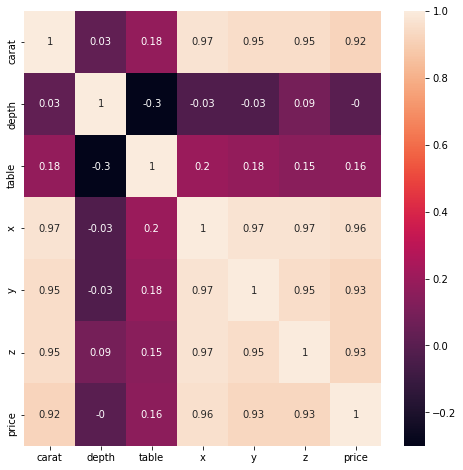

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(df_train.corr().round(2), annot = True)

There is an extremely high collinearity between carat, x, y and z. We can drop then one by one and check again for collinearity to see if we can reduce the dataset without losing valuable information

In [11]:
df_train = df_train.drop('x', axis = 1)

<AxesSubplot:>

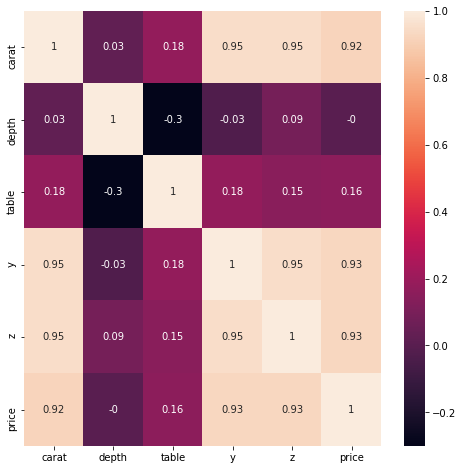

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(df_train.corr().round(2), annot = True)

In [13]:
df_train = df_train.drop('y', axis = 1)

<AxesSubplot:>

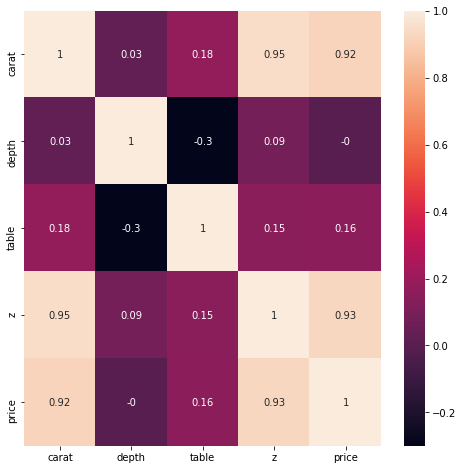

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df_train.corr().round(2), annot = True)

In [15]:
df_train = df_train.drop('z', axis = 1)

<AxesSubplot:>

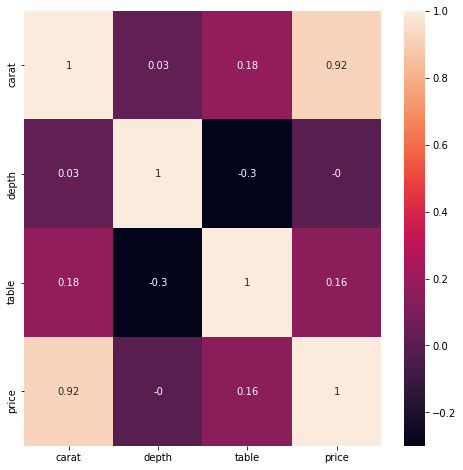

In [16]:
plt.figure(figsize=(8,8))
sns.heatmap(df_train.corr().round(2), annot = True)

There is also a very high colinearity between price and carats, so one of the models could use just carats

We now do the same for the test df

In [17]:
df_test = df_test.drop(['x', 'y', 'z'], axis = 1)

In [18]:
df_test.head()

,carat,cut,color,clarity,depth,table
id,,,,,,
0,0.51,Very Good,E,SI2,58.3,61.9
1,1.02,Very Good,F,SI2,63.0,58.0
2,0.59,Ideal,D,VS2,61.9,56.0
3,0.90,Very Good,D,VS2,62.3,56.0
4,2.01,Premium,J,VS1,60.2,61.0


**Convert categorical values to ordinal**

The cut column seems to be ranked, so we can use a `label_encoder`

In [19]:
from sklearn import preprocessing

In [20]:
label_encoder = preprocessing.LabelEncoder()

In [21]:
df_train_dummy = df_train
df_train_dummy['cut'] = label_encoder.fit_transform(df_train['cut'])

In [22]:
df_test_dummy = df_test
df_test_dummy['cut'] = label_encoder.fit_transform(df_test['cut'])

For color and clarity, we can use `get_dummies`

In [23]:
df_train_dummy = pd.get_dummies(df_train, columns=["color", "clarity"], drop_first=True)

In [24]:
df_test_dummy = pd.get_dummies(df_test, columns=["color", "clarity"], drop_first=True)

Let's check how the data looks

In [25]:
df_train_dummy.head()

,carat,cut,depth,table,price,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,
0,1.50,3,61.5,58.0,9.588,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2.01,4,60.6,59.0,9.748,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0.50,2,61.6,57.0,7.255,1,0,0,0,0,0,0,1,0,0,0,0,0
3,0.25,4,61.6,57.0,6.450,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0.52,2,62.0,55.0,7.721,0,0,1,0,0,0,0,0,0,0,1,0,0


In [26]:
df_test_dummy.head()

,carat,cut,depth,table,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,
0,0.51,4,58.3,61.9,1,0,0,0,0,0,0,0,1,0,0,0,0
1,1.02,4,63.0,58.0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0.59,2,61.9,56.0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0.90,4,62.3,56.0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.01,3,60.2,61.0,0,0,0,0,0,1,0,0,0,1,0,0,0


## Saving the data

In [29]:
df_train_dummy.to_csv("../data/clean_train_01.csv")

In [30]:
df_test_dummy.to_csv("../data/clean_test_01.csv")